In [ ]:
"""
GRUPO

Nome: Bernardo Siqueira Esteves dos Reis
TIA: 32019270
Nome:  Pedro Henrique Ikeda
TIA: 32016344
Nome: Lucas Kenzo Akiyama      
TIA: 32025165

source: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo
"""

In [91]:
import numpy as np
import pandas as pd
from random import choices
from seaborn import set_style
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ADT import *
from tableClasses import *

set_style("whitegrid")
rcParams['font.family'] = "serif"

# Function to rename some countries in the dataset to fit in plots
def rename(df):
    try:
        df['NOC'] = df['NOC'].replace("ROC", "Russia")
        df['NOC'] = df['NOC'].replace("People's Republic of China", "China")
        df['NOC'] = df['NOC'].replace("United States of America", "EUA")
    except KeyError:
        df['Team/NOC'] = df['Team/NOC'].replace("ROC", "Russia")
        df['Team/NOC'] = df['Team/NOC'].replace("People's Republic of China", "China")
        df['Team/NOC'] = df['Team/NOC'].replace("United States of America", "EUA")
    finally:
        return df
    
# Function that reads the dataset from .csv and pass each row as a Node into the AVL Tree
def create_tree(path, t_class, attr):
    df = pd.read_csv(f"../Datasets/{path}.csv")
    df = rename(df)
    tree = AVL_Tree()
    for row in df.values:
        tree.insert(t_class, row, attr)
    return tree

# Function that reads the Tree in order and store the data 
# in a Python Dictionary sorting the 10 greates value
def get_table_values(root, func, attr1, attr2):
    dic = func(root, {}, attr1, attr2)
    dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
    dic = {k: dic[k] for k in list(dic)[:10]}
    return dic

# Function that creates the plot using data stored in the dictionary after analysed in the tree
def create_results_bar(dic, name, colors, xlabel, ylabel, title):
    [print(i, "with", j, name) for i,j in dic.items() if j == max(dic.values())]
    plt.figure(figsize=(8, 6), dpi=80)
    plt.bar(dic.keys(), dic.values(), color=colors)
    plt.xticks(rotation=315)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

The country(ies) with the most athletes is: 
EUA with 613 athletes


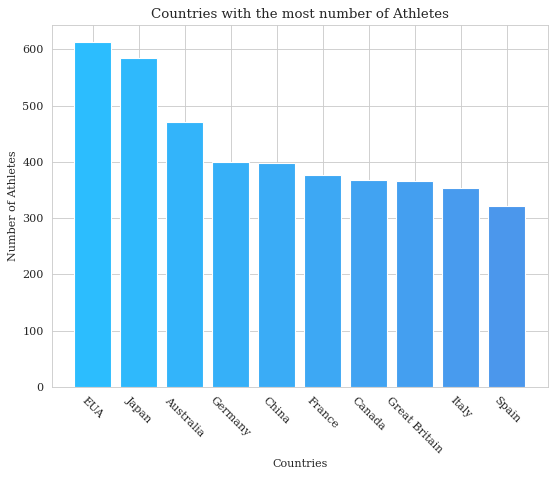

In [92]:
# Countries with the most number of Athletes
t1 = create_tree("Athletes", Athletes, "name")
countries_part = get_table_values(t1.root, t1.data_analysis, "country", 1)
print("The country(ies) with the most athletes is: ")
blues = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8', '#3aacf6', 
         '#3da8f4', '#41a3f2', '#449ff0','#489bee', '#4b97ec']
create_results_bar(countries_part, "athletes", blues, "Countries", 
                   "Number of Athletes", "Countries with the most number of Athletes")


The sport(s) with the most athletes is: 
Athletics with 2066 athletes


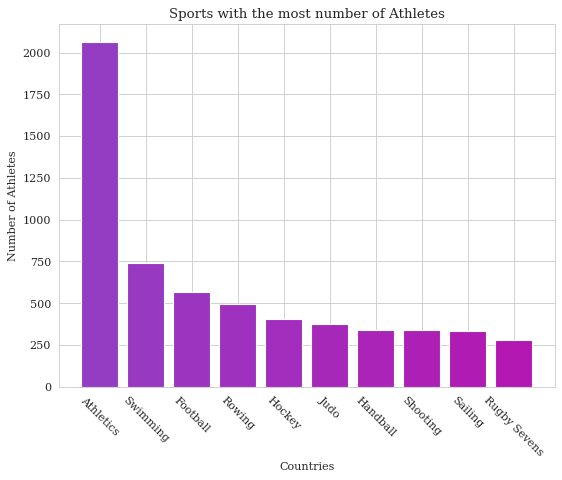

In [93]:
# Sports with the most number of Athletes
sports_part = get_table_values(t1.root, t1.data_analysis, "sport", 1)
print("\nThe sport(s) with the most athletes is: ")
purples = ['#943dc3', '#9739c1', '#9b35bf', '#9e31bd', '#a22cbb', 
           '#a528b9', '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']
create_results_bar(sports_part, "athletes", purples, "Countries", 
                   "Number of Athletes", "Sports with the most number of Athletes")


The country(ies) with the most coaches is: 
Japan with 35 coaches


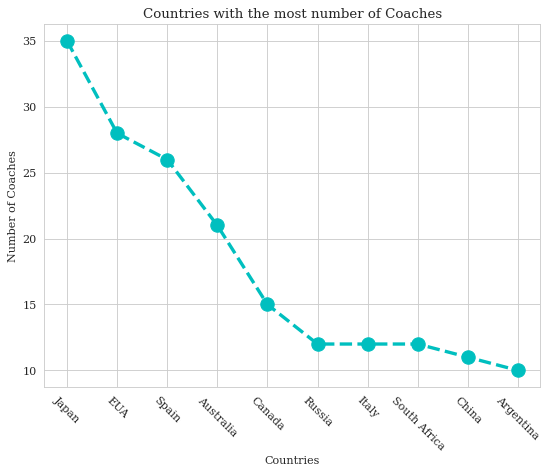

In [94]:
# Countries with the most number of Coaches
t2 = create_tree("Coaches", Coaches, "name")
coaches_country = get_table_values(t2.root, t2.data_analysis, "country", 1)
print("\nThe country(ies) with the most coaches is: ")
[print(i, "with", j, "coaches") for i,j in coaches_country.items() if j == max(coaches_country.values())]
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(coaches_country.keys(), coaches_country.values(), marker="o", markersize=12, linestyle="dashed", linewidth=3, color="c")
plt.xticks(rotation=315)
plt.ylabel("Number of Coaches")
plt.xlabel("Countries")
plt.title("Countries with the most number of Coaches")
plt.show()


The sport(s) with the most coaches is: 
Basketball with 74 coaches


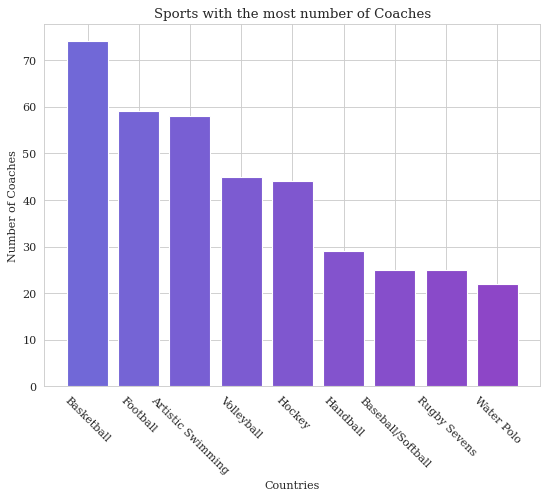

In [95]:
# Sports with the most number of Coaches
coaches_sport = get_table_values(t2.root, t2.data_analysis, "sport", 1)
print("\nThe sport(s) with the most coaches is: ")
blue_purple = ['#7168d7', '#7564d5', '#785fd3', '#7c5bd1', '#7f57cf', 
               '#8353cd', '#864ecb', '#894ac9', '#8d46c7', '#9042c5',]
create_results_bar(coaches_sport, "coaches", blue_purple, "Countries", "Number of Coaches", "Sports with the most number of Coaches")


The sport(s) with the most male athletes is: 
Athletics with 1072 male athletes


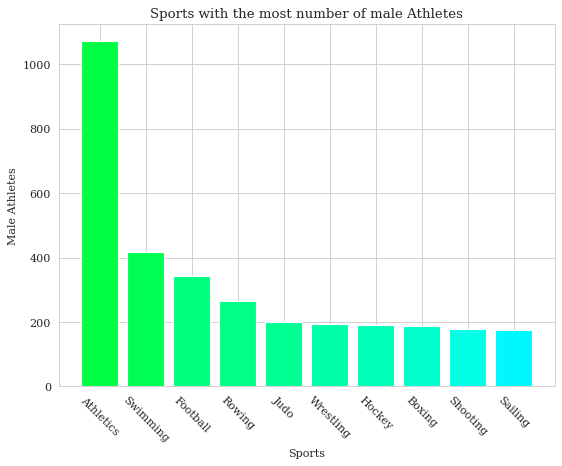

In [96]:
# Sports with the most number of male Athletes
t3 = create_tree("EntriesGender", EntriesGender, "sport")
coaches_sport = get_table_values(t3.root, t3.data_analysis, "sport", "male")
green_cyan = ["#00FF42", "#00FF55", "#00FF7C", "#00FF87", "#00FF93", 
              "#00FFAA", "#00FFB9", "#00FFCD", "#00FFE4", "#00F7FF"]
print("\nThe sport(s) with the most male athletes is: ")
create_results_bar(coaches_sport, "male athletes", green_cyan, "Sports", "Male Athletes", "Sports with the most number of male Athletes")


The sport(s) with the most athletes is: 
Athletics with 969 female athletes


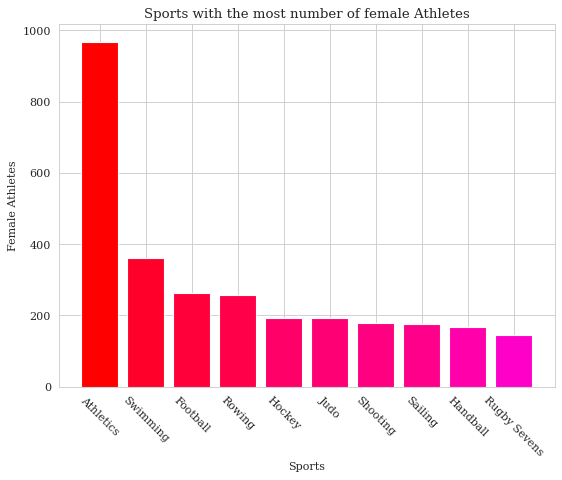

In [97]:
# Sports with the most number of female Athletes
coaches_sport = get_table_values(t3.root, t3.data_analysis, "sport", "female")
red_pink = ["#FF0000", "#FF002B", "#FF003A", "#FF0049", "#FF0068", 
            "#FF0074", "#FF0080", "#FF008B", "#FF00AA", "#FF00C9"]
print("\nThe sport(s) with the most athletes is: ")
create_results_bar(coaches_sport, "female athletes", red_pink, "Sports", "Female Athletes", "Sports with the most number of female Athletes")


The team(s) with the most gold medals is: 
EUA with 39 gold medals


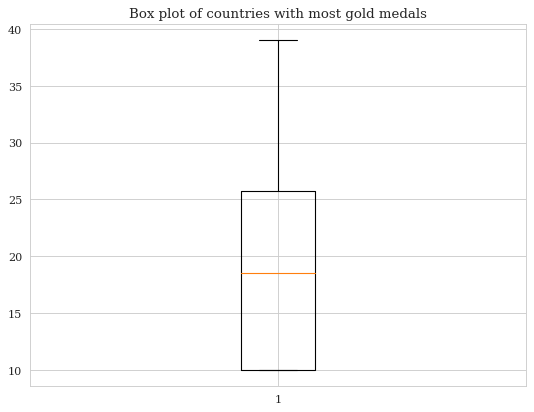

In [98]:
# Box plot of countries with most gold medals
t4 = create_tree("Medals", Medals, "rank")
medals_gold = get_table_values(t4.root, t4.data_analysis, "team", "gold")
print("\nThe team(s) with the most gold medals is: ")
[print(i, "with", j, "gold medals") for i,j in medals_gold.items() if j == max(medals_gold.values())]
plt.figure(figsize=(8, 6), dpi=80)
plt.boxplot(medals_gold.values())
plt.title("Box plot of countries with most gold medals")
plt.show()

In [99]:
medals_total = get_table_values(t4.root, t4.data_analysis, "team", "total")
medals_silver = get_table_values(t4.root, t4.data_analysis, "team", "silver")
medals_bronze = get_table_values(t4.root, t4.data_analysis, "team", "bronze")
ind = np.arange(len(medals_total.keys()))


The team(s) with the most medals is: 
EUA with 113 medals


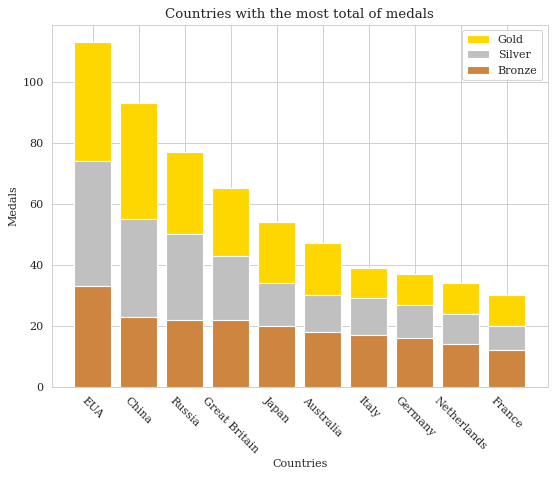

In [100]:
# Countries with the most total of medals
print("\nThe team(s) with the most medals is: ")
[print(i, "with", j, "medals") for i,j in medals_total.items() if j == max(medals_total.values())]
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(ind, medals_gold.values() , color='gold' , bottom=np.array(list(medals_silver.values()))+np.array(list(medals_bronze.values())))
plt.bar(ind, medals_silver.values(), color='silver', bottom=np.array(list(medals_bronze.values())))
plt.bar(ind, medals_bronze.values(), color='#CD853F')
plt.xticks(ind, medals_total.keys(), rotation=315)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(["Gold", "Silver", "Bronze"])
plt.title("Countries with the most total of medals")
plt.show()


The country(ies) with the most teams is: 
EUA with 47 teams


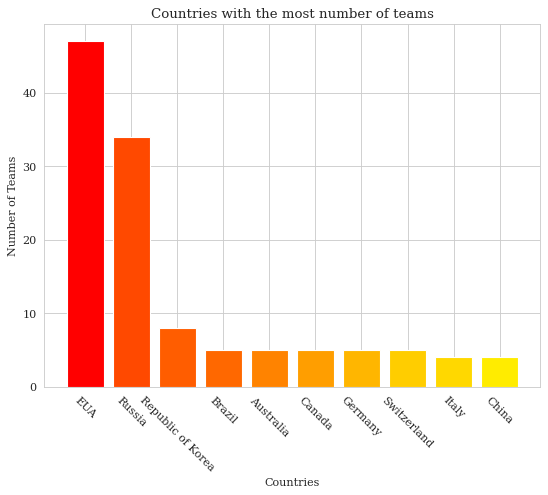

In [101]:
# Countries with the most number of teams
t5 = create_tree("Teams", Teams, "country")
teams = get_table_values(t5.root, t5.data_analysis, "country", 1)
yellow_green = ["#FF0000", "#FF4900", "#FF5D00", "#FF6800",  "#FF8300", 
                "#FF9E00", "#FFB600", "#FFCD00", "#FFD800", "#FFEC00"]
print("\nThe country(ies) with the most teams is: ")
create_results_bar(teams, "teams", yellow_green, "Countries", "Number of Teams", "Countries with the most number of teams")

In [102]:
df_teams = pd.read_csv(f"../Datasets/Teams.csv")
df_teams["Event"].value_counts()

Men                                 120
Women                               114
Men's Team                           40
Women's Team                         40
Mixed Team                           29
Duet                                 22
Mixed Relay                          18
Women's 4 x 200m Freestyle Relay     17
Women's 4 x 400m Relay               16
Women's 4 x 100m Medley Relay        16
Men's 4 x 200m Freestyle Relay       16
Mixed 4 x 100m Medley Relay          16
Men's 4 x 100m Medley Relay          16
Women's 4 x 100m Freestyle Relay     16
Women's Madison                      16
Men's Madison                        16
Mixed Doubles                        16
Women's 4 x 100m Relay               16
Men's 4 x 100m Relay                 16
Men's 4 x 400m Relay                 16
Men's 4 x 100m Freestyle Relay       16
4 x 400m Relay Mixed                 15
Group All-Around                     14
Team                                 10
Men's Foil Team                       9


In [103]:
mens = ["Men's Team", "Men's 4 x 100m Medley Relay", "Men's 4 x 100m Freestyle Relay", "Men's Madison",
       "Men's 4 x 100m Relay", "Men's 4 x 400m Relay", "Men's 4 x 200m Freestyle Relay", "Men's Foil Team",
       "Men's Épée Team", "Men's Sabre Team", "Men's Team Sprint", "Men's Team Pursuit"]
women = ["Women's Team", "Women's 4 x 200m Freestyle Relay", "Women's 4 x 400m Relay", 
          "Women's 4 x 100m Medley Relay", "Women's 4 x 100m Freestyle Relay", "Women's Madison", 
          "Women's 4 x 100m Relay", "Women's Sabre Team", "Women's Foil Team", "Women's Épée Team",
         "Women's Team Sprint", "Women's Team Pursuit"]
mixeds = ["Mixed 4 x 100m Medley Relay", "Mixed Doubles", "4 x 400m Relay Mixed", "Mixed Team", "Mixed Relay"]

In [104]:
df_teams.loc[df_teams["Event"].isin(mens), "Event"] = "Men"
df_teams.loc[df_teams["Event"].isin(women), "Event"] = "Women"
df_teams.loc[df_teams["Event"].isin(mixeds), "Event"] = "Mixed"

In [105]:
mens_count = df_teams.loc[df_teams["Event"] == "Men", "Event"].count()
women_count = df_teams.loc[df_teams["Event"] == "Women", "Event"].count()
mixed_count = df_teams.loc[df_teams["Event"] == "Mixed", "Event"].count()
df_teams["Event"].value_counts()

Men                 299
Women               292
Mixed                94
Duet                 22
Group All-Around     14
Team                 10
Softball              6
Baseball              6
Name: Event, dtype: int64

In [106]:
total = (mens_count + women_count + mixed_count)
mens_prop = mens_count / total
women_prop = women_count / total
mixeds_prop = women_count / total

In [107]:
others = ["Duet", "Group All-Around", "Team", "Softball", "Baseball"]
df_teams.loc[df_teams["Event"].isin(others), "Event"] = np.NaN

In [108]:
nans = df_teams["Event"].isna()
nans_sum = nans.sum()

In [109]:
nans_replace = choices(["Men", "Women", "Mixed"], weights=[mens_prop, women_prop, mixeds_prop], k=nans_sum)
df_teams.loc[nans, 'Event'] = nans_replace
df_teams["Event"].value_counts()

Men      314
Women    313
Mixed    116
Name: Event, dtype: int64

In [110]:
# Percentage of gender in teams
t6 = AVL_Tree()
for row in df_teams.values:
    t6.insert(Teams, row, "gender")
genders_teams = get_table_values(t6.root, t6.data_analysis, "gender", 1)


The teams genders with the most teams is: 
Men with 314 teams


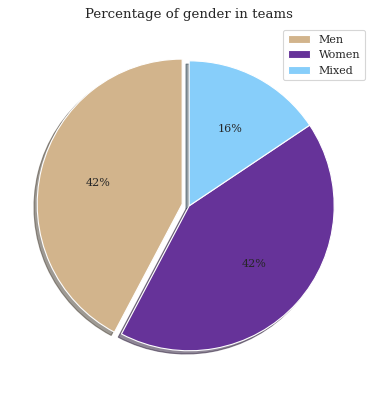

In [111]:
print("\nThe teams genders with the most teams is: ")
[print(i, "with", j, "teams") for i,j in genders_teams.items() if j == max(genders_teams.values())]
colors = ['#D2B48C', '#663399', '#87CEFA']
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(genders_teams.values(), shadow=True, autopct='%1.f%%', explode=[0.05,0,0], startangle=90, colors=colors)
plt.legend(genders_teams.keys())
plt.title("Percentage of gender in teams")
plt.show()